# Plot precision & recall

In [5]:
import pandas as pd
from matplotlib import ticker
import seaborn as sns


df1 = pd.read_csv("../results/eval_sparse.csv", index_col=0)
df2 = pd.read_csv("../results/eval_dense.csv", index_col=0)
df1['before_f1'] = 2 * (df1['before_precision'] * df1['before_recall']) / (df1['before_precision'] + df1['before_recall'] + .00001)
df1['after_f1'] = 2 * (df1['after_precision'] * df1['after_recall']) / (df1['after_precision'] + df1['after_recall'] + .00001)
df2['before_f1'] = 2 * (df2['before_precision'] * df2['before_recall']) / (df2['before_precision'] + df2['before_recall'] + .00001)
df2['after_f1'] = 2 * (df2['after_precision'] * df2['after_recall']) / (df2['after_precision'] + df2['after_recall'] + .00001)
df1['type'] = 'sparse'
df2['type'] = 'dense'
df = pd.concat([df1, df2], axis=0)
prec = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_precision', 'after_precision'])
recall = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_recall', 'after_recall'])
f1 = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_f1', 'after_f1'])


def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"



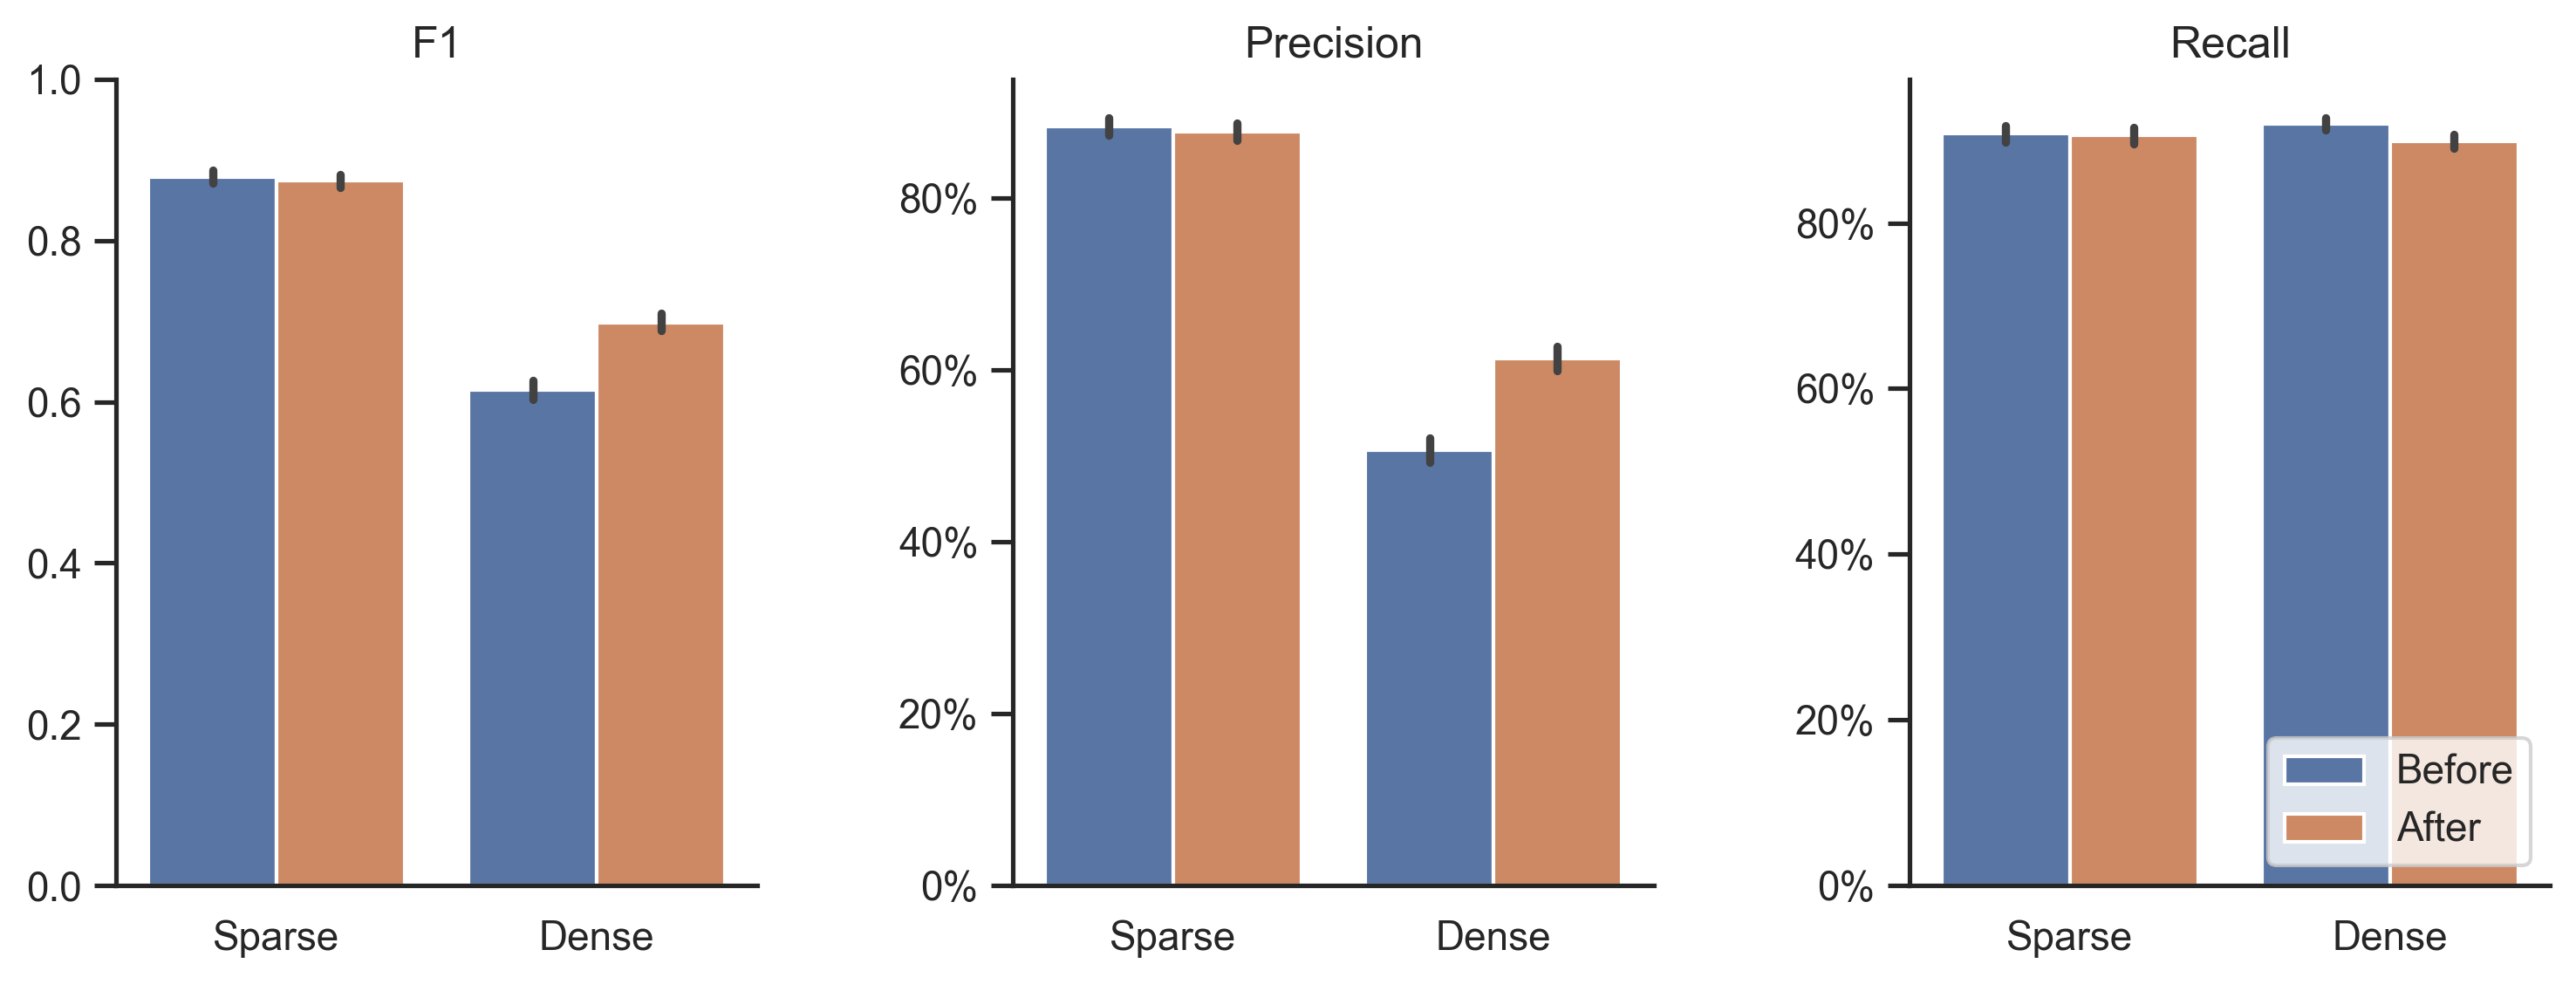

In [9]:
from scipy.stats import ttest_ind

def test(ax, x1, x2, y, h, fs, a, b):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k")
    stat,p_value = ttest_ind(a, b)
    ax.text((x1+x2)*.5, y - h, convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color="k")

# plot precision
sns.set(font_scale=1, style='white')
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)

# precision
ax = sns.barplot(data=prec, hue='stat', x='type', y='value', ax=axs[1], legend=False)
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
# test(ax, 0, 4, 1.15 - .05, .02, 'small', df['before_precision'], df['my_precision'])
# test(ax, 3, 4, 1.15 - .12, .02, 'small', df['after_precision'], df['my_precision'])
# ax.text(0, m['raw_precision']+.03, f"{m['raw_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(1, m['ada_precision']+.03, f"{m['ada_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(2, m['mul_precision']+.03, f"{m['mul_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(3, m['guo_precision']+.03, f"{m['guo_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(4, m['my_precision']+.03, f"{m['my_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)

# recall
ax = sns.barplot(data=recall, hue='stat', x='type', y='value', ax=axs[2])
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)

# f1
ax = sns.barplot(data=f1, hue='stat', x='type', y='value', ax=axs[0], legend=False)
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('F1')
ax.set_ylim(0, 1)
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=['Before', 'After'], loc='lower right')

In [32]:
handles, labels

([], [])

# soma detection evaluation

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
with open(r"D:\rectify\multi_soma_test\eval.pkl", 'rb') as f:
    hit, miss = pickle.load(f)
tot = 159
prec = {}
recall = {}
for k, v in hit.items():
    recall[k] = v / tot
    prec[k] = 1 - miss[k] / (v + miss[k])

[Text(0, 0, 'Vol'),
 Text(1, 0, 'DT'),
 Text(2, 0, 'SWC'),
 Text(3, 0, 'Merge (SWC-)'),
 Text(4, 0, 'Merge (SWC+)')]

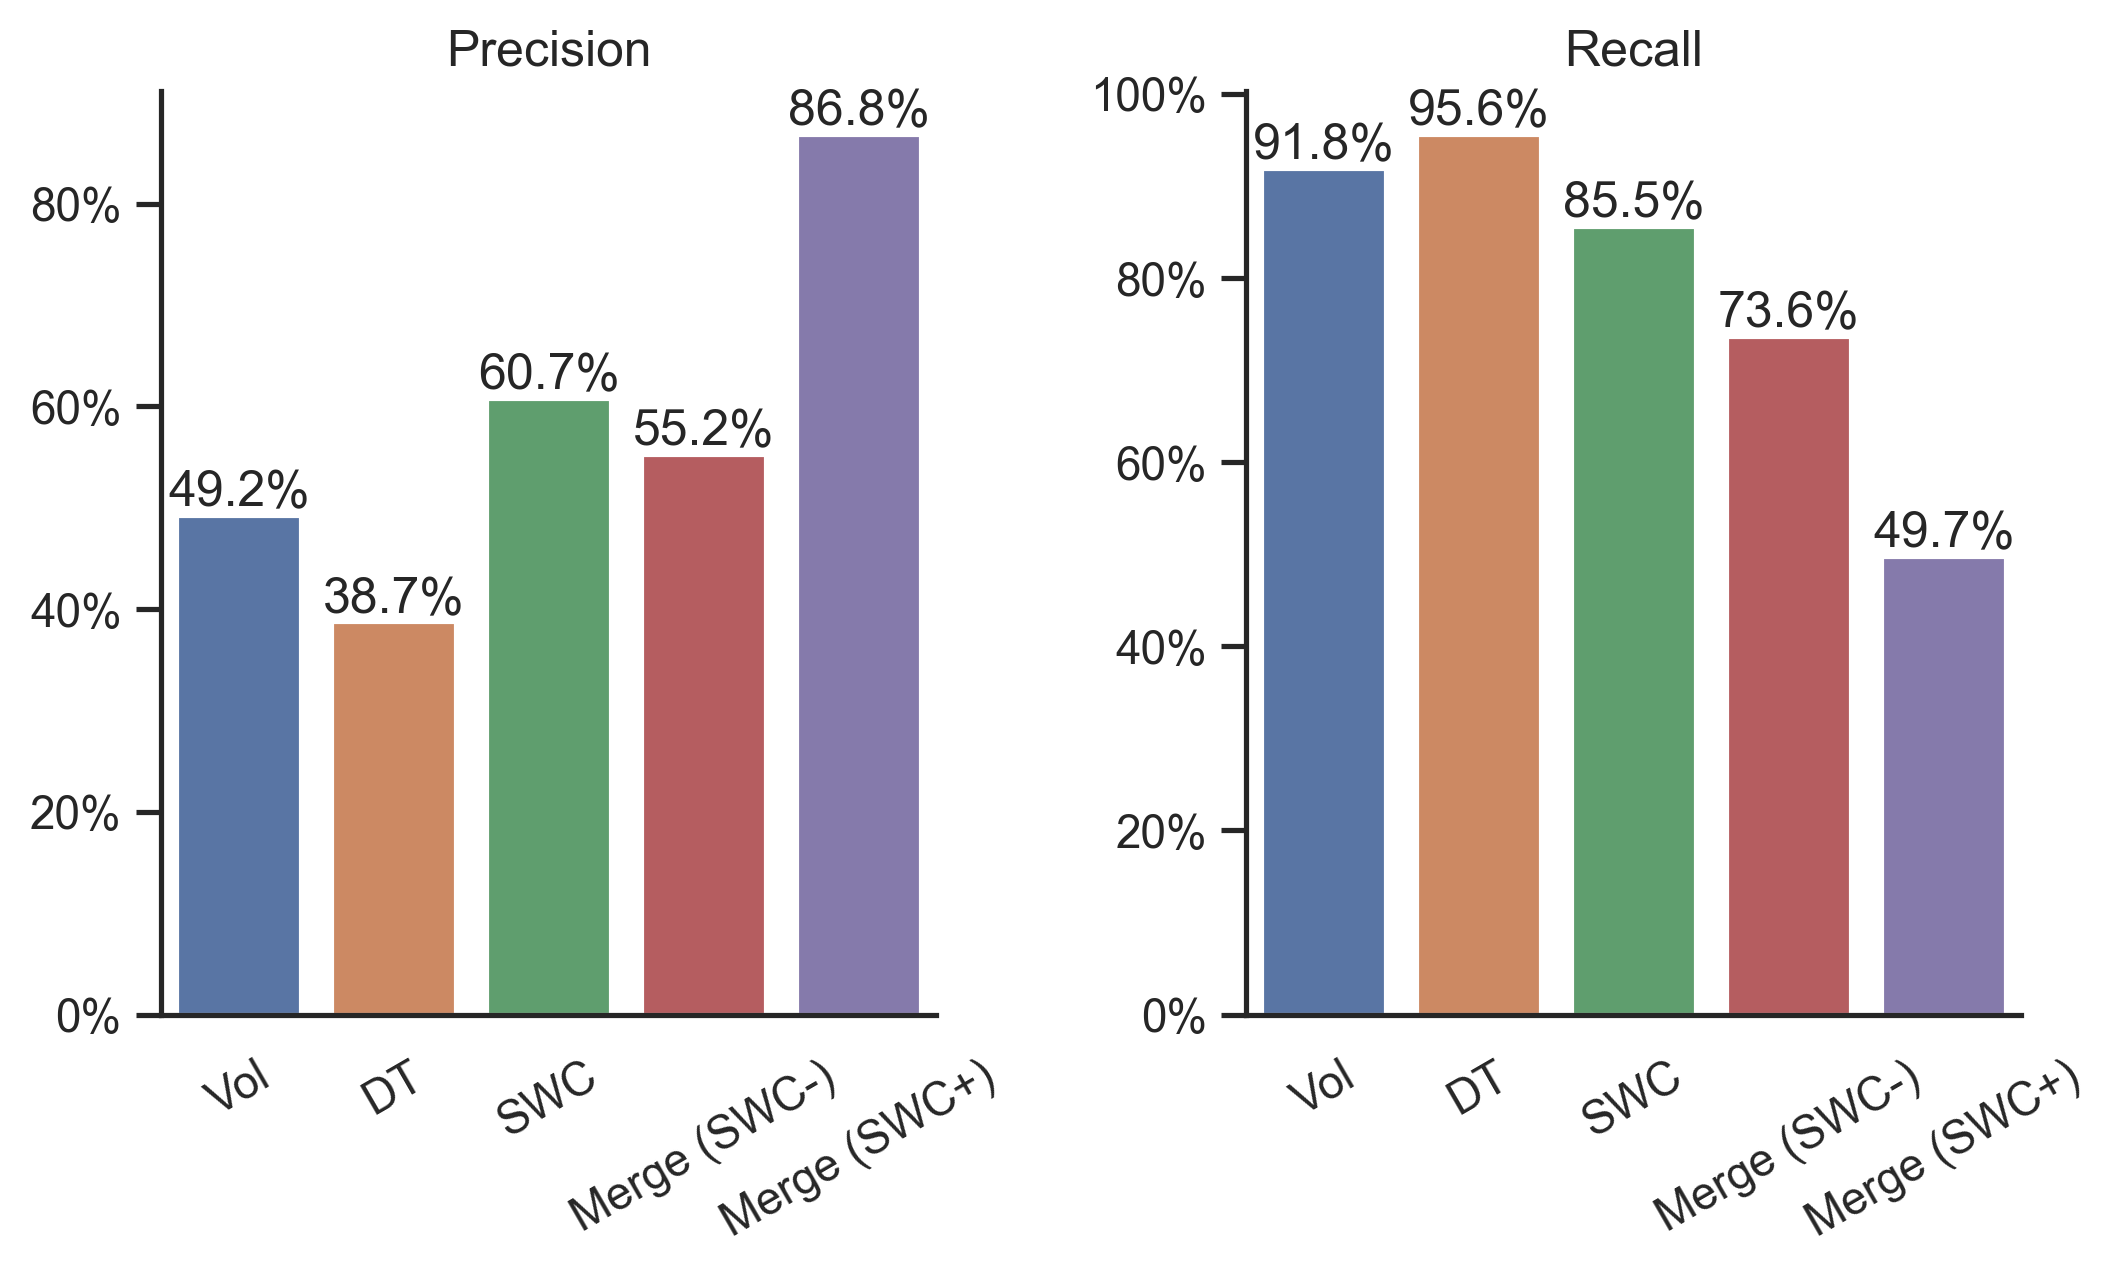

In [28]:
import pandas as pd
from matplotlib import ticker
sns.set(font_scale=1, style='white')
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)

ax = sns.barplot(pd.DataFrame(prec, index=range(len(prec))), ax=axs[0], legend=False)
ax.set_title('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([*range(5)], ['Vol', 'DT', 'SWC', 'Merge (SWC-)', 'Merge (SWC+)'])
for i, value in enumerate(prec.values()):
    ax.text(i, value, f'{value * 100:.1f}%', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

ax = sns.barplot(pd.DataFrame(recall, index=range(len(prec))), ax=axs[1], legend=False)
ax.set_title('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([*range(5)], ['Vol', 'DT', 'SWC', 'Merge (SWC-)', 'Merge (SWC+)'])
for i, value in enumerate(recall.values()):
    ax.text(i, value, f'{value * 100:.1f}%', ha='center', va='bottom')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

In [2]:
sns.set(font_scale=1, style='white')
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)

# precision
ax = sns.barplot(data=prec, hue='stat', x='type', y='value', ax=axs[1], legend=False)
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)

# recall
ax = sns.barplot(data=recall, hue='stat', x='type', y='value', ax=axs[2])
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)

# f1
ax = sns.barplot(data=f1, hue='stat', x='type', y='value', ax=axs[0], legend=False)
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('F1')
ax.set_ylim(0, 1)
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=['Before', 'After'], loc='lower right')

({'def': 0.9182389937106918,
  'dt': 0.9559748427672956,
  'swc': 0.8553459119496856,
  'con_img': 0.7358490566037735,
  'con_all': 0.4968553459119497},
 {'def': 0.49158249158249157,
  'dt': 0.38676844783715014,
  'swc': 0.6071428571428572,
  'con_img': 0.5518867924528301,
  'con_all': 0.8681318681318682})

# seg prune

In [29]:
import pandas as pd
from matplotlib import ticker
import seaborn as sns


df1 = pd.read_csv("../results/seg_prune_eval_sparse.csv", index_col=0)
df2 = pd.read_csv("../results/seg_prune_eval_dense.csv", index_col=0)
df1['before_f1'] = 2 * (df1['before_precision'] * df1['before_recall']) / (df1['before_precision'] + df1['before_recall'] + .00001)
df1['after_f1'] = 2 * (df1['after_precision'] * df1['after_recall']) / (df1['after_precision'] + df1['after_recall'] + .00001)
df2['before_f1'] = 2 * (df2['before_precision'] * df2['before_recall']) / (df2['before_precision'] + df2['before_recall'] + .00001)
df2['after_f1'] = 2 * (df2['after_precision'] * df2['after_recall']) / (df2['after_precision'] + df2['after_recall'] + .00001)
df1['type'] = 'sparse'
df2['type'] = 'dense'
df = pd.concat([df1, df2], axis=0)
prec = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_precision', 'after_precision'])
recall = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_recall', 'after_recall'])
f1 = df.reset_index().melt(id_vars=['index', 'type'], var_name='stat', value_name='value', value_vars=['before_f1', 'after_f1'])


def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"



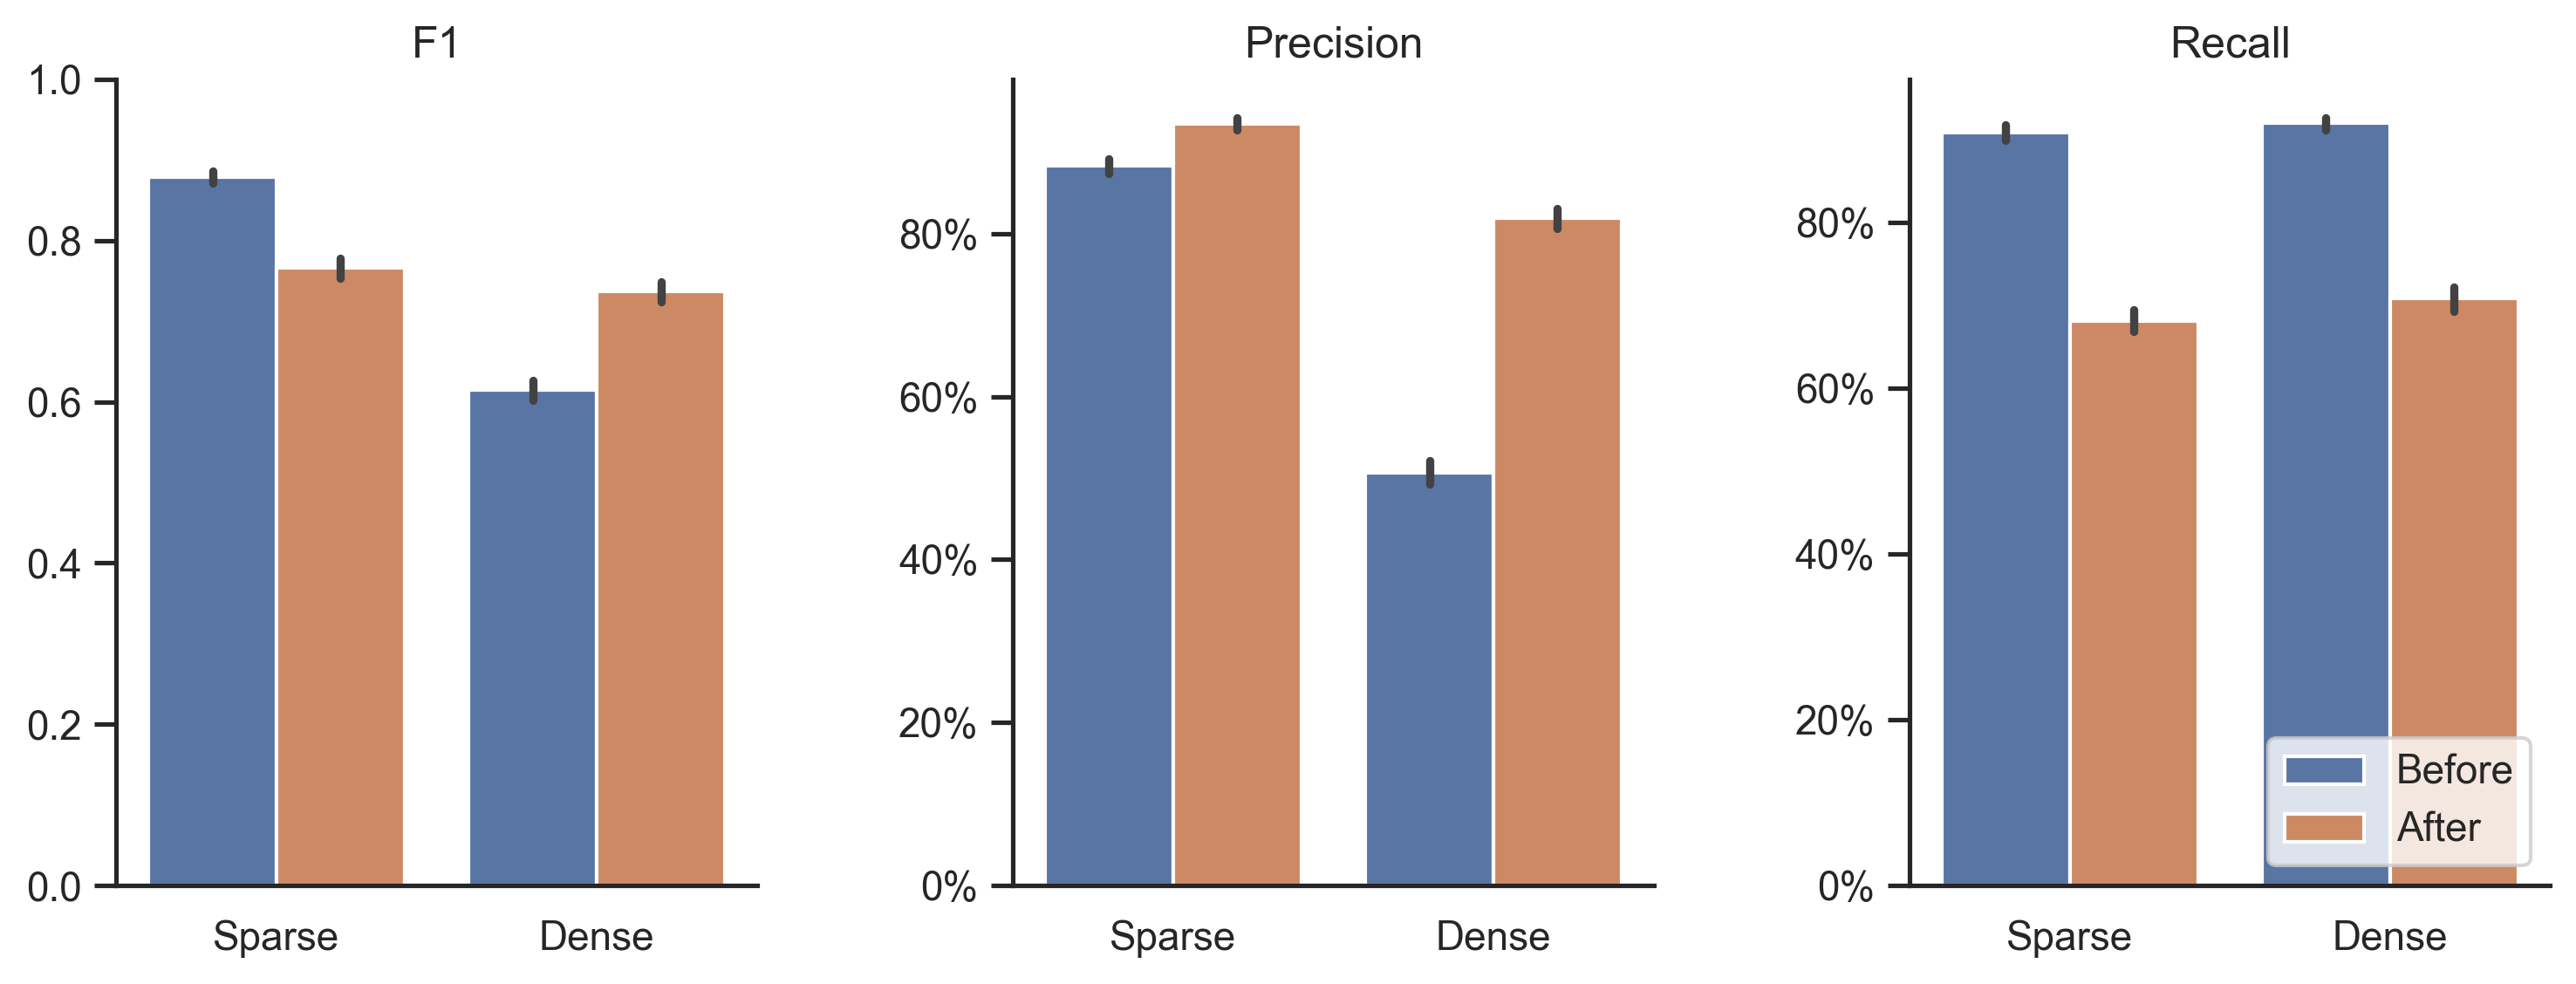

In [30]:
from scipy.stats import ttest_ind

def test(ax, x1, x2, y, h, fs, a, b):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k")
    stat,p_value = ttest_ind(a, b)
    ax.text((x1+x2)*.5, y - h, convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color="k")

# plot precision
sns.set(font_scale=1, style='white')
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)

# precision
ax = sns.barplot(data=prec, hue='stat', x='type', y='value', ax=axs[1], legend=False)
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
# test(ax, 0, 4, 1.15 - .05, .02, 'small', df['before_precision'], df['my_precision'])
# test(ax, 3, 4, 1.15 - .12, .02, 'small', df['after_precision'], df['my_precision'])
# ax.text(0, m['raw_precision']+.03, f"{m['raw_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(1, m['ada_precision']+.03, f"{m['ada_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(2, m['mul_precision']+.03, f"{m['mul_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(3, m['guo_precision']+.03, f"{m['guo_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
# ax.text(4, m['my_precision']+.03, f"{m['my_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)

# recall
ax = sns.barplot(data=recall, hue='stat', x='type', y='value', ax=axs[2])
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)

# f1
ax = sns.barplot(data=f1, hue='stat', x='type', y='value', ax=axs[0], legend=False)
ax.set_xticks([*range(2)], ['Sparse', 'Dense'])
ax.set_ylabel(None)
ax.set_title('F1')
ax.set_ylim(0, 1)
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=['Before', 'After'], loc='lower right')

# seg prune old

In [49]:
from pathlib import Path
from tqdm import tqdm
from ecut.morphology import Morphology
from ecut.swc_handler import parse_swc
in_dir = Path(r"D:\200k\test")
count = []
for i in tqdm(in_dir.rglob('*.swc')):
    tree = parse_swc(i)
    m = Morphology(tree)
    count.append(m.calc_total_length() / 2)

96915it [01:37, 998.84it/s] 


In [51]:
in_dir = Path(r"D:\rectify\manual")
count2 = []
for i in tqdm(in_dir.rglob('*.swc')):
    tree = parse_swc(i)
    m = Morphology(tree)
    count2.append(m.calc_total_length() / 4)

1891it [00:32, 57.92it/s] 


In [80]:
in_dir = Path(r"D:\rectify\manual")
count3 = []
for i in tqdm(in_dir.rglob('*.swc')):
    tree = parse_swc(i)
    tree = [list(t) for t in tree if t[1] != 2]
    keys = set([t[0] for t in tree])
    for t in tree:
        if t[6] not in keys:
            t[6] = -1
    m = Morphology(tree)
    count3.append(m.calc_total_length() / 4)

1891it [00:34, 55.36it/s]


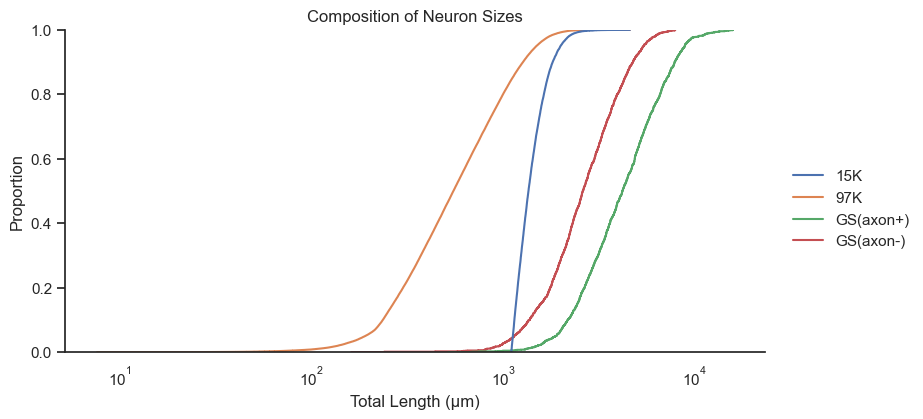

In [92]:
import numpy as np

sns.set(font_scale=1, style='white')
counts = {
    '15K': np.array(sorted(count)[-15000:]) * 4,
    '97K': np.array(count) * 4,
    'GS(axon+)': count2,
    'GS(axon-)': count3
}
ax = sns.displot(counts, kind='ecdf', aspect=2, log_scale=10, height=4)
plt.xlabel('Total Length (μm)')
plt.title('Composition of Neuron Sizes')
ax.tick_params(left=True, direction='out')


# seg prune new

In [93]:
from pathlib import Path
from tqdm import tqdm
from ecut.morphology import Morphology
from ecut.swc_handler import parse_swc
in_dir = Path(r"D:\200k\result_0927")
count4 = []
for i in tqdm(in_dir.rglob('*.swc')):
    tree = parse_swc(i)
    m = Morphology(tree)
    count4.append(m.calc_total_length() / 4)

179568it [24:50, 120.49it/s] 


In [97]:
filt = r"C:\Users\zzh\Documents\WXWork\1688850447617822\Cache\File\2024-04\final_filtered_swc0207.txt"
with open(filt, 'r') as f:
    swcs = [i.split('_stps')[0] for i in f.readlines()]
files = list(in_dir.rglob('*.swc'))
keys = [i.stem for i in files]
m = dict(zip(keys, range(len(keys))))
count5 = [count4[m[i]] for i in swcs]

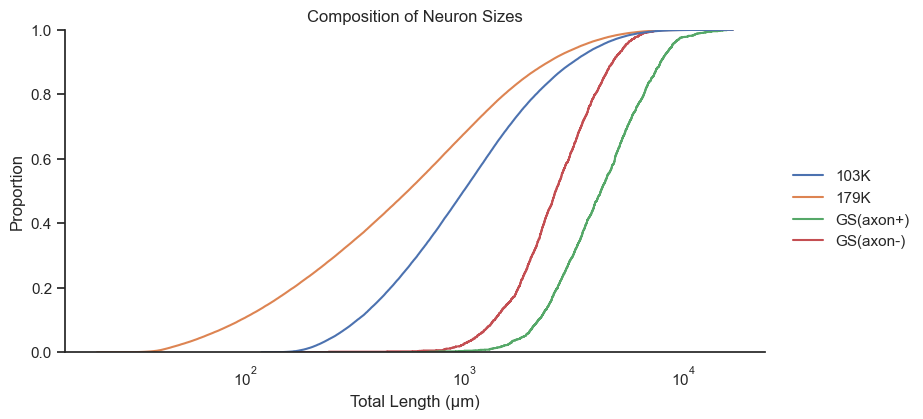

In [98]:
import numpy as np

sns.set(font_scale=1, style='white')
counts = {
    '103K': count5,
    '179K': count4,
    'GS(axon+)': count2,
    'GS(axon-)': count3
}
ax = sns.displot(counts, kind='ecdf', aspect=2, log_scale=10, height=4)
plt.xlabel('Total Length (μm)')
plt.title('Composition of Neuron Sizes')
ax.tick_params(left=True, direction='out')